**Title: Music Recommendation System**

**Author: Ihechiluru Winner**

**Linked-in: https://www.linkedin.com/in/ihechiluru-winner/**

# **Importing Library Resources**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

from sklearn.metrics import accuracy_score, confusion_matrix
print("LIBRARIES SUCCESSFULLY IMPORTED!!!");

LIBRARIES SUCCESSFULLY IMPORTED!!!


# **Reading CVS Datasets Into The DataFrame**

In [ ]:
songs_df = pd.read_csv('/content/songs.csv')
test_df = pd.read_csv('/content/test.csv')
train_df = pd.read_csv('/content/train.csv')
members_df = pd.read_csv('/content/members.csv')
extra_df = pd.read_csv('/content/song_extra_info.csv')

In [ ]:
songs_df.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [ ]:
extra_df.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [ ]:
members_df.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [ ]:
train_df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1.0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1.0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1.0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1.0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1.0


In [ ]:
test_df.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


# **Statistical Analysis**

In [ ]:
print('Song DF has shape:', songs_df.shape)
print('Members DF has shape:', members_df.shape)
print('Songs Extra DF has shape:', extra_df.shape)
print('Training Data Set has shape:', train_df.shape)
print('Test Data Set has shape:', test_df.shape)

Song DF has shape: (708716, 7)
Members DF has shape: (34403, 7)
Songs Extra DF has shape: (898400, 3)
Training Data Set has shape: (492955, 6)
Test Data Set has shape: (510155, 6)


In [ ]:
songs_df.describe()

,song_length,language
count,7.087160e+05,708714.000000
mean,2.477522e+05,30.390974
std,1.522304e+05,24.047950
min,1.850000e+02,-1.000000
25%,1.911470e+05,3.000000
50%,2.301170e+05,52.000000
75%,2.757480e+05,52.000000
max,1.096911e+07,59.000000


In [ ]:
print('Unique values in the song df are:', songs_df['genre_ids'].unique())

Unique values in the song df are: ['465' '444' '726' '864|857|850|843' '458' '352|1995' '2157' '359' '1609'
 '139' nan '873' '1955' '1011' '2022' '2122' '786|947' '242' '1259'
 '465|921' '1609|2107' '921' '947' '958' '880' '481' '139|125|109' '786'
 '798' '451' '1152' '940' '465|1259' '1082' '545' '921|465' '437' '829'
 '430' '1969' '388|873' '94' '786|726' '444|1609' '465|430' '1572|275'
 '409' '893' '1616' '712' '465|958' '465|2122' '465|409' '786|958'
 '940|1152' '2130' '465|798' '1152|940' '786|2086|374' '1568' '465|1609'
 '465|786' '1152|947' '940|388' '388' '1138' '474' '465|2022|958'
 '1152|786' '1180' '1068' '2086|374' '465|139' '423' '184|2122' '744'
 '691' '2189|367' '880|873|786' '719' '444|2022' '2072' '1609|458'
 '1152|921' '958|786' '465|359' '850' '2022|947' '2086|374|139|125|109'
 '1977' '465|2022' '402' '1152|465' '458|1287' '139|444|109' '829|786'
 '242|2022' '1616|1609' '388|139' '2122|786' '880|458' '726|958' '2079'
 '921|458' '822' '2122|947|726' '921|451' '1152|78

In [ ]:
members_df.describe()

,city,bd,registered_via,registration_init_time,expiration_date
count,34403.000000,34403.000000,34403.000000,3.440300e+04,3.440300e+04
mean,5.371276,12.280935,5.953376,2.013994e+07,2.016901e+07
std,6.243929,18.170251,2.287534,2.954015e+04,7.320925e+03
min,1.000000,-43.000000,3.000000,2.004033e+07,1.970010e+07
25%,1.000000,0.000000,4.000000,2.012103e+07,2.017020e+07
50%,1.000000,0.000000,7.000000,2.015090e+07,2.017091e+07
75%,10.000000,25.000000,9.000000,2.016110e+07,2.017093e+07
max,22.000000,1051.000000,16.000000,2.017023e+07,2.020102e+07


In [ ]:
members_df['city'].unique()

array([ 1, 13, 12, 15,  5,  6,  4, 11, 18, 22, 14,  8, 20,  3, 17, 10, 16,
        9, 21,  7, 19])

In [ ]:
members_df['registered_via'].unique()

array([ 7,  4,  9,  3, 13, 16])

In [ ]:
members_df['gender'].unique()

array([nan, 'female', 'male'], dtype=object)

In [ ]:
members_df['bd'].unique()
#age and it has outlier values as well 

array([   0,   43,   28,   33,   20,   30,   29,   26,   25,   21,   22,
         16,   23,   37,   18,   19,   51,   24,   17,   45,   36,   57,
         27,   34,   32,   15,   48,   50,   54,   47,   35,   46,   31,
         14,   41,   59,    2,   40,   38,   55,   39,   73,   49,   44,
        103,   52,   70,   42,   65,   56,  101,   58,   53,   64,   63,
         76,   66,   97,    3,   72,   67,   62,   61,  105,   60,   13,
         90,   12,   68,  131,   74,   89,  931,  -38,  144,   85,  112,
         96,   11,  102,   83, 1051,   87,    7,   95,  -43,  111,   93,
          5,   78, 1030,  106,  107,   82,   10])

In [ ]:
bd_young = members_df[ members_df['bd'] <= 3].index
bd_old = members_df[ members_df['bd'] >= 110].index

In [ ]:
members_df.drop(bd_old, inplace = True)
members_df.drop(bd_young, inplace = True)

In [ ]:
members_df.shape

(14456, 7)

# **Merging Datasets**

In [ ]:
train_members = pd.merge(train_df, members_df, on='msno', how='inner')
train_merged = pd.merge(train_members, songs_df, on='song_id', how='outer')

test_members = pd.merge(test_df, members_df, on='msno', how='inner')
test_merged = pd.merge(test_members, songs_df, on='song_id', how='outer')

In [ ]:
train_merged

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,registration_init_time,expiration_date,song_length,genre_ids,artist_name,composer,lyricist,language
0,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1.0,13.0,24.0,female,9.0,20110525.0,20170911.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1.0,13.0,24.0,female,9.0,20110525.0,20170911.0,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,52.0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1.0,13.0,24.0,female,9.0,20110525.0,20170911.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,VkILU0H1h3NMmk9MQrXouNudGk5n8Ls5cqRRuBxeTh4=,my library,Local playlist more,local-playlist,1.0,13.0,24.0,female,9.0,20110525.0,20170911.0,229982.0,465,BIGBANG TAEYANG,TEDDY| DEE.P| Rebecca Johnson,TEDDY| TAEYANG,31.0
4,30mzMBkLfBFFn+U0VpWu8nyo76SIiz2AZZgoYWpIjXU=,VkILU0H1h3NMmk9MQrXouNudGk5n8Ls5cqRRuBxeTh4=,my library,Local playlist more,local-library,1.0,4.0,31.0,female,9.0,20080105.0,20170922.0,229982.0,465,BIGBANG TAEYANG,TEDDY| DEE.P| Rebecca Johnson,TEDDY| TAEYANG,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965130,NaN,3T8hF/yq0FbMD4FIfJlKbMGV/AlXEvcfy28CvDM8PM0=,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,226720.0,2122,Quincy Jones,Quincy Jones,NaN,-1.0
965131,NaN,GNxQxCw0HW2pZwIfHbh++xe9DTbYLcOrEHSxiB4tAkQ=,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180373.0,1011,The BossHoss,Hoss Power,NaN,52.0
965132,NaN,BBDwVFBx7G3df0BNdFfkEHFFCTjOCa0udmtzUAUiGTA=,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,544365.0,829,Merceditas Valdes,Anonimo,Anonimo,52.0
965133,NaN,DLC2EGe9z+obsI2j4yrjRMUgrEmFbg6GFNvUXM/ZpsU=,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,198817.0,NaN,Salsa,Neuromancer,NaN,-1.0


In [ ]:
test_merged

,id,msno,song_id,source_system_tab,source_screen_name,source_type,city,bd,gender,registered_via,registration_init_time,expiration_date,song_length,genre_ids,artist_name,composer,lyricist,language
0,3.0,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio,3.0,30.0,male,9.0,20070725.0,20170430.0,285210.0,465,U2,The Edge| Adam Clayton| Larry Mullen| Jr.,NaN,52.0
1,2407.0,91GgOFj9CDFYxxqRxQBT5L7FYjborQ40TReKAqpfQrs=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio,14.0,33.0,male,9.0,20060923.0,20170930.0,285210.0,465,U2,The Edge| Adam Clayton| Larry Mullen| Jr.,NaN,52.0
2,504892.0,+mgVKuFx7nQC2drU/g4/jQsejSRQzdygXseFgMDGIfM=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio,13.0,38.0,male,3.0,20131002.0,20171219.0,285210.0,465,U2,The Edge| Adam Clayton| Larry Mullen| Jr.,NaN,52.0
3,4.0,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio,3.0,30.0,male,9.0,20070725.0,20170430.0,197590.0,873,Yoga Mr Sound,Neuromancer,NaN,-1.0
4,5.0,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,NV3nhEcMqsawwvSNTUAt9IVAexHLOm0lDfrHyEfN5B0=,radio,Radio,radio,3.0,30.0,male,9.0,20070725.0,20170430.0,216372.0,465,LEE HI,NaN,NaN,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963553,NaN,NaN,3T8hF/yq0FbMD4FIfJlKbMGV/AlXEvcfy28CvDM8PM0=,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,226720.0,2122,Quincy Jones,Quincy Jones,NaN,-1.0
963554,NaN,NaN,GNxQxCw0HW2pZwIfHbh++xe9DTbYLcOrEHSxiB4tAkQ=,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180373.0,1011,The BossHoss,Hoss Power,NaN,52.0
963555,NaN,NaN,BBDwVFBx7G3df0BNdFfkEHFFCTjOCa0udmtzUAUiGTA=,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,544365.0,829,Merceditas Valdes,Anonimo,Anonimo,52.0
963556,NaN,NaN,DLC2EGe9z+obsI2j4yrjRMUgrEmFbg6GFNvUXM/ZpsU=,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,198817.0,NaN,Salsa,Neuromancer,NaN,-1.0


# **Visualization On Train Set**

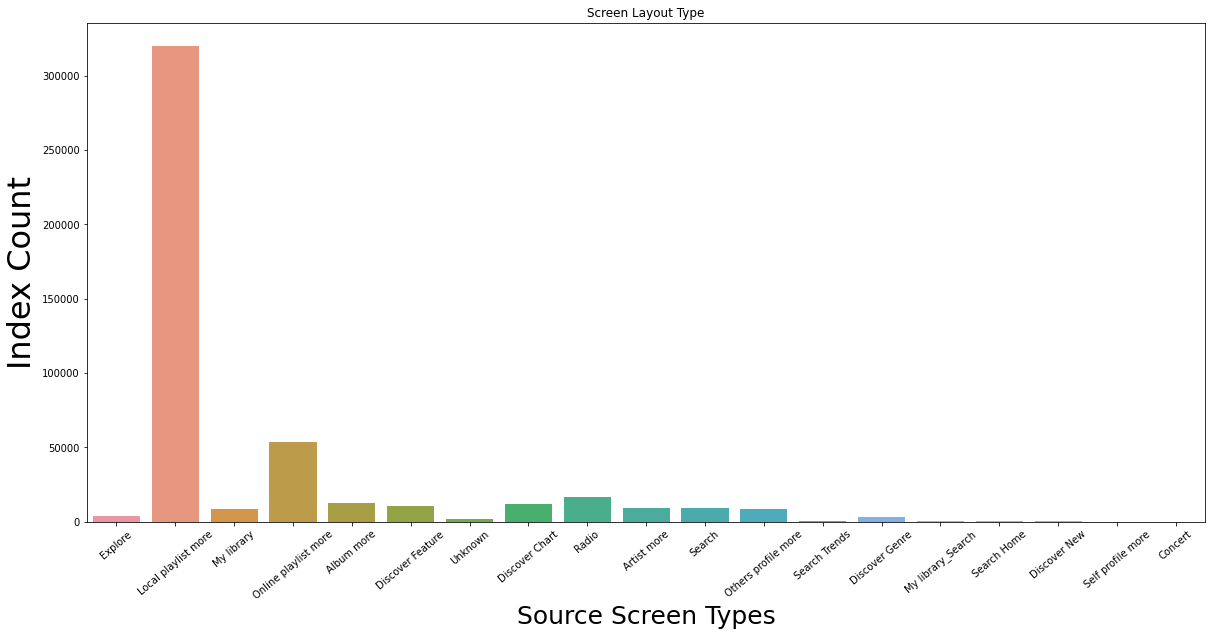

In [ ]:
plt.figure( figsize = (17, 9))
sns.countplot(x = 'source_screen_name', linewidth = 6, data= train_df)
plt.xlabel('Source Screen Types', fontsize = 25)
plt.ylabel('Index Count', fontsize = 32)
sns.set(style= "darkgrid")
plt.xticks(rotation = '40')
plt.title('Screen Layout Type')
plt.tight_layout();

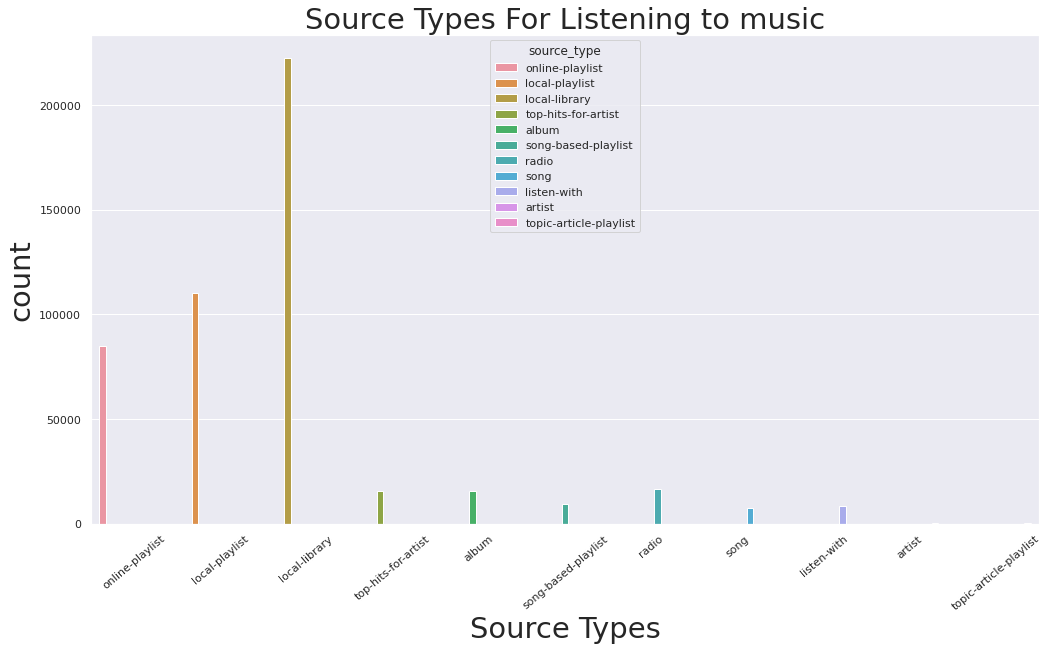

In [ ]:
plt.figure(figsize= (17,9))
sns.countplot(x = 'source_type', hue = 'source_type', data = train_df)
sns.set(style= 'darkgrid')
plt.xlabel('Source Types', fontsize= 29)
plt.ylabel('count', fontsize = 29)
plt.xticks(rotation = '40')
plt.title('Source Types For Listening to music', fontsize = 29);

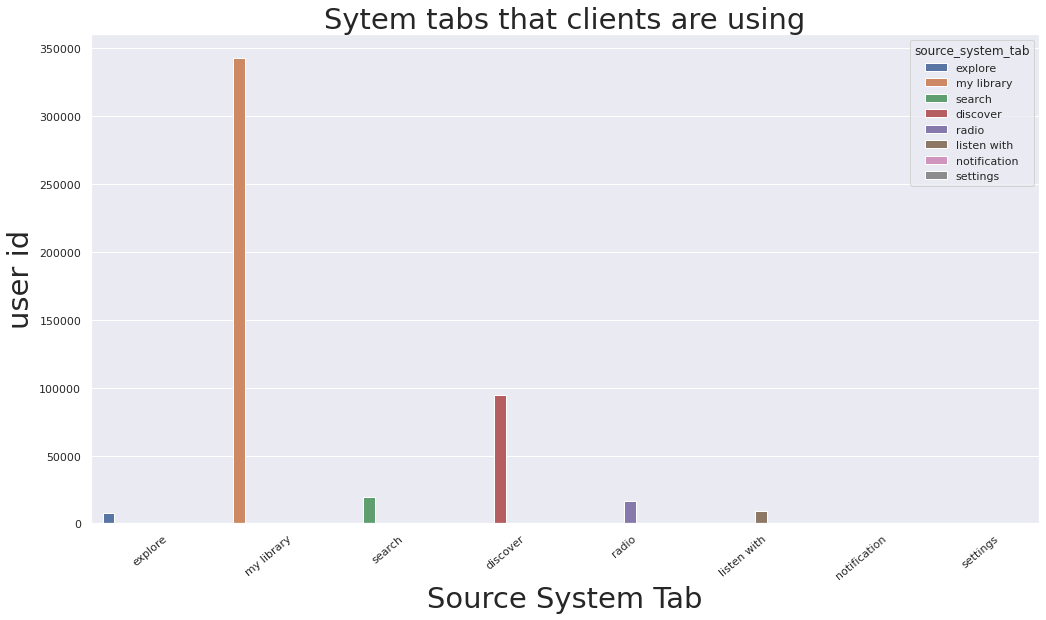

In [ ]:
plt.figure(figsize = (17, 9)) 
sns.countplot(x='source_system_tab', hue= 'source_system_tab' ,data=train_df)
sns.set(style= 'darkgrid')
plt.xlabel('Source System Tab', fontsize= 29)
plt.ylabel('user id', fontsize = 29)
plt.xticks(rotation = '40')
plt.title('Sytem tabs that clients are using', fontsize = 29);

# **Visualization on Songs Data Set**

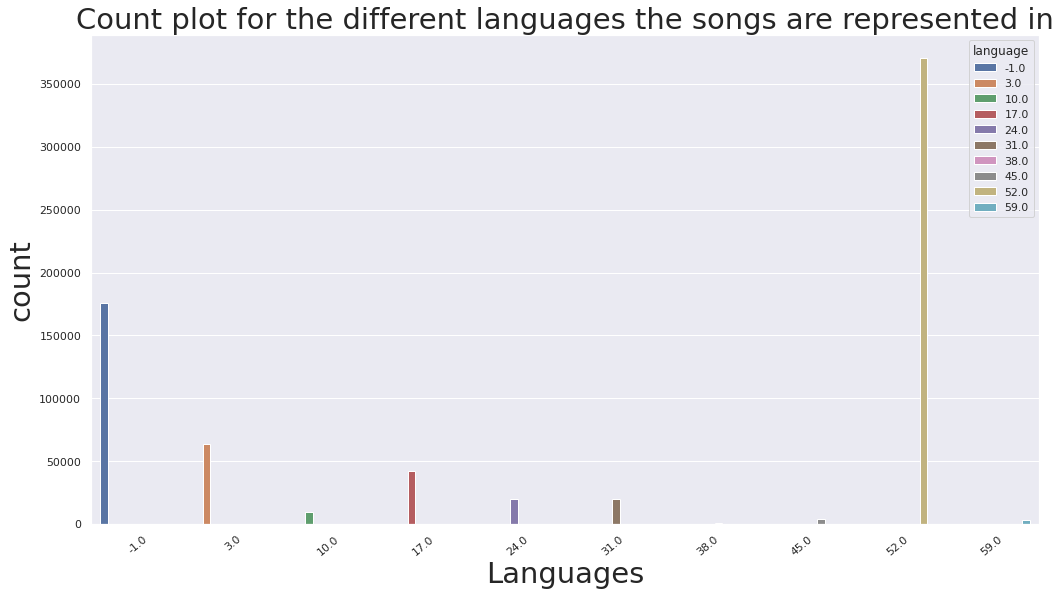

In [ ]:
plt.figure(figsize= (17,9))
sns.countplot(x = 'language', hue = 'language', data = songs_df)
sns.set(style= 'darkgrid')
plt.xlabel('Languages', fontsize= 29)
plt.ylabel('count', fontsize = 29)
plt.xticks(rotation = '40')
plt.title('Count plot for the different languages the songs are represented in', fontsize = 29);

# **Visualization Of Train Data Frame merged with Members Dataframe**

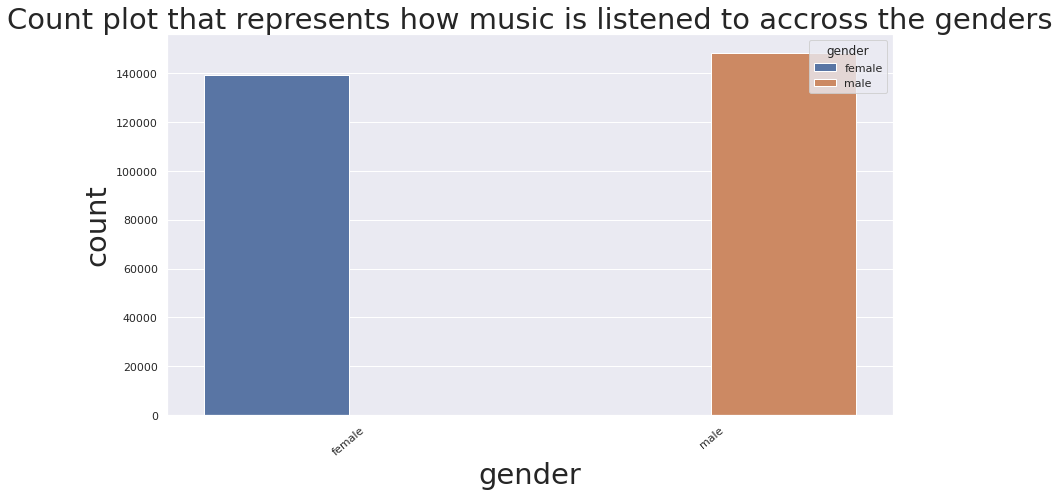

In [ ]:
plt.figure(figsize= (13,7))
sns.countplot(x = 'gender', hue = 'gender', data = train_merged)
sns.set(style= 'darkgrid')
plt.xlabel('gender', fontsize= 29)
plt.ylabel('count', fontsize = 29)
plt.xticks(rotation = '40')
plt.title('Count plot that represents how music is listened to accross the genders', fontsize = 29);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


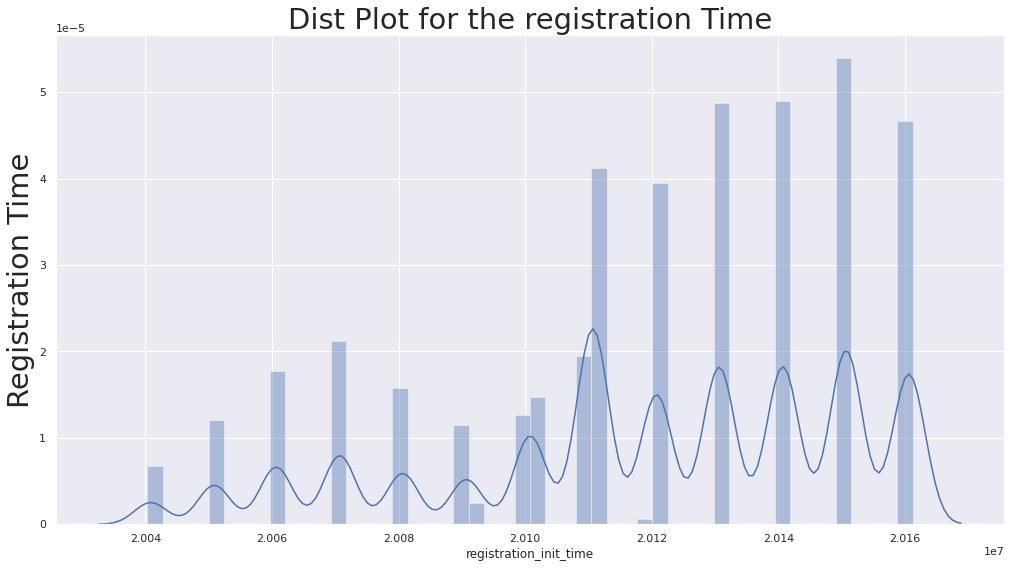

In [ ]:
plt.figure(figsize = (17, 9)) 
sns.distplot(train_merged.registration_init_time)
sns.set(style= 'darkgrid')


plt.ylabel('Registration Time', fontsize = 29)

plt.title('Dist Plot for the registration Time', fontsize = 29);

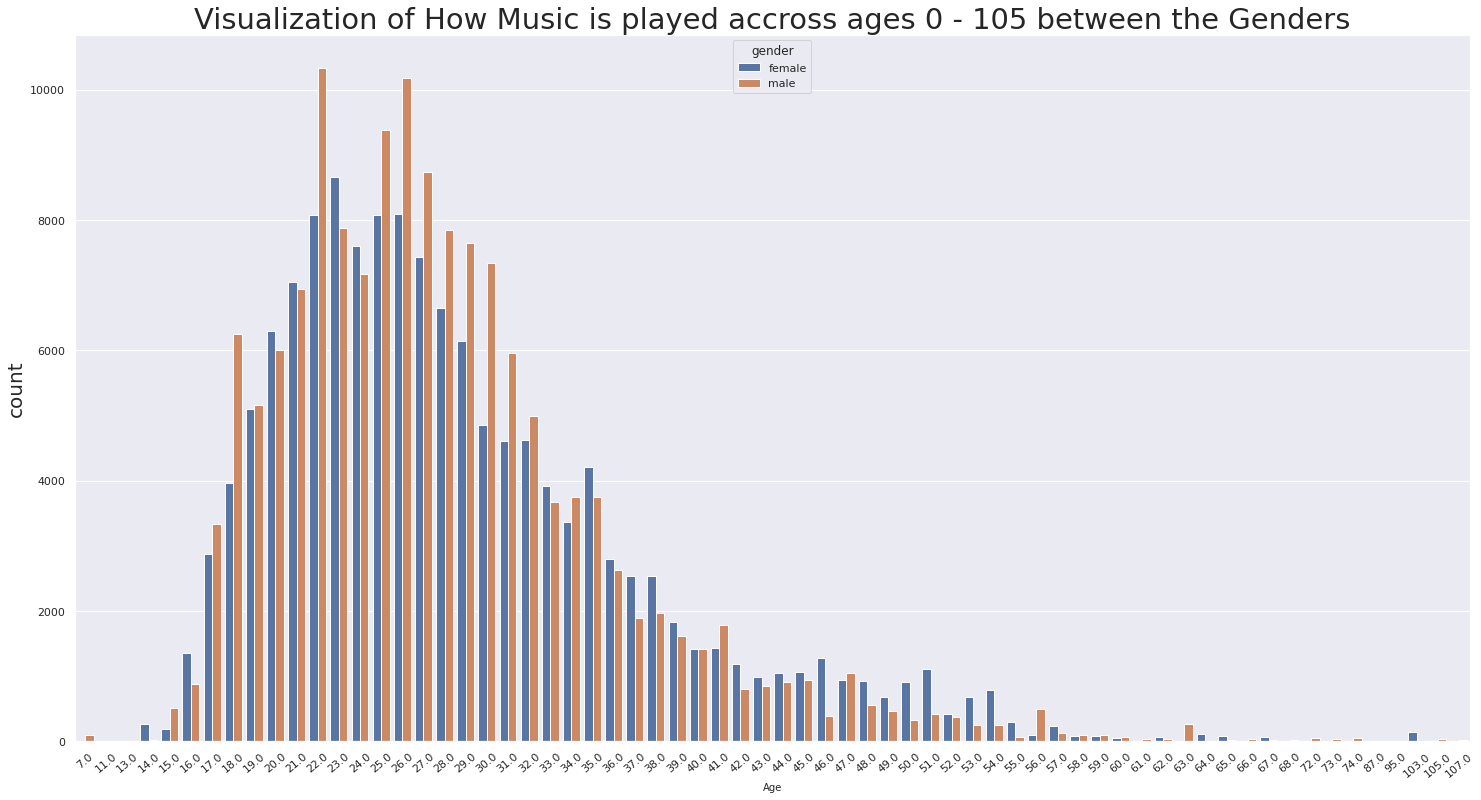

In [ ]:
plt.figure(figsize= (25,13))
sns.countplot(x = 'bd', hue = 'gender', data = train_merged)
sns.set(style= 'darkgrid')
plt.xlabel('Age', fontsize= 10)
plt.ylabel('count', fontsize = 20)
plt.xticks(rotation = '40')
plt.title('Visualization of How Music is played accross ages 0 - 105 between the Genders', fontsize = 29);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


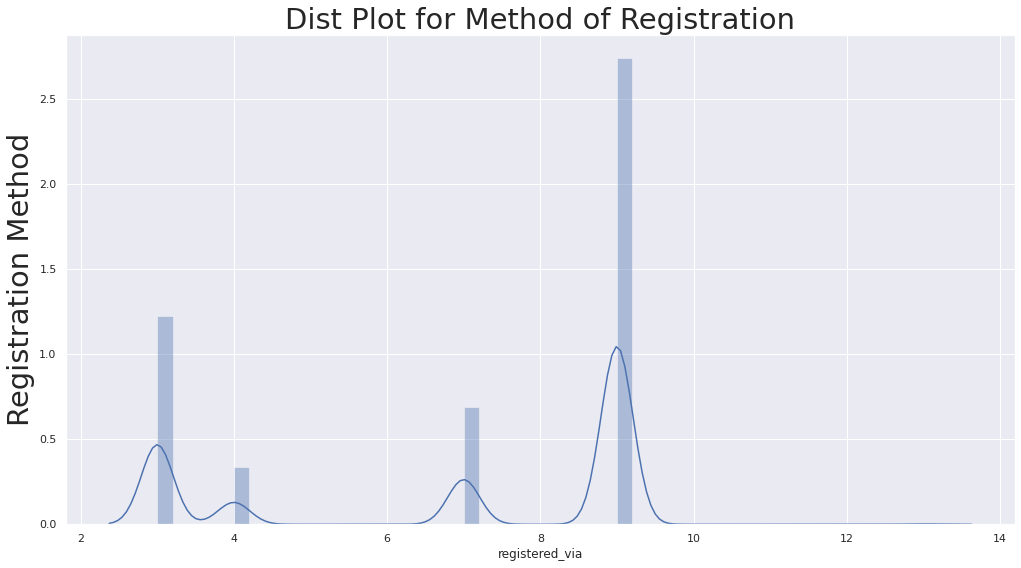

In [ ]:
plt.figure(figsize = (17, 9)) 
sns.distplot(train_merged.registered_via)
sns.set(style= 'darkgrid')


plt.ylabel('Registration Method', fontsize = 29)

plt.title('Dist Plot for Method of Registration', fontsize = 29);

# **Data Preprocessing**

In [ ]:
train_merged.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,registration_init_time,expiration_date,song_length,genre_ids,artist_name,composer,lyricist,language
0,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1.0,13.0,24.0,female,9.0,20110525.0,20170911.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1.0,13.0,24.0,female,9.0,20110525.0,20170911.0,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,52.0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1.0,13.0,24.0,female,9.0,20110525.0,20170911.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,VkILU0H1h3NMmk9MQrXouNudGk5n8Ls5cqRRuBxeTh4=,my library,Local playlist more,local-playlist,1.0,13.0,24.0,female,9.0,20110525.0,20170911.0,229982.0,465,BIGBANG TAEYANG,TEDDY| DEE.P| Rebecca Johnson,TEDDY| TAEYANG,31.0
4,30mzMBkLfBFFn+U0VpWu8nyo76SIiz2AZZgoYWpIjXU=,VkILU0H1h3NMmk9MQrXouNudGk5n8Ls5cqRRuBxeTh4=,my library,Local playlist more,local-library,1.0,4.0,31.0,female,9.0,20080105.0,20170922.0,229982.0,465,BIGBANG TAEYANG,TEDDY| DEE.P| Rebecca Johnson,TEDDY| TAEYANG,31.0


In [ ]:
del train_merged['composer']
del train_merged['artist_name']


In [ ]:
del train_merged['lyricist']

In [ ]:
del test_merged['lyricist']
del test_merged['composer']
del test_merged['artist_name']

In [ ]:
train_merged

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,registration_init_time,expiration_date,song_length,genre_ids,language
3,0.0,4.0,0.0,1.0,2.0,1.0,13.0,24.0,0.0,9.0,20110525.0,20170911.0,229982.0,1.0,31.0
4,5.0,4.0,0.0,1.0,3.0,1.0,4.0,31.0,0.0,9.0,20080105.0,20170922.0,229982.0,1.0,31.0
5,6.0,4.0,0.0,1.0,3.0,1.0,13.0,21.0,0.0,9.0,20160425.0,20180916.0,229982.0,1.0,31.0
6,7.0,4.0,0.0,1.0,2.0,1.0,6.0,24.0,0.0,3.0,20130113.0,20170923.0,229982.0,1.0,31.0
7,8.0,4.0,4.0,5.0,6.0,1.0,13.0,29.0,1.0,3.0,20111228.0,20170908.0,229982.0,1.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297390,9632.0,63298.0,0.0,1.0,2.0,1.0,13.0,25.0,1.0,7.0,20121230.0,20170930.0,205411.0,13.0,52.0
297396,6317.0,63304.0,22.0,23.0,22.0,0.0,13.0,54.0,1.0,3.0,20131230.0,20171002.0,239049.0,1.0,-1.0
297398,6317.0,63306.0,0.0,1.0,3.0,0.0,13.0,54.0,1.0,3.0,20131230.0,20171002.0,222249.0,1.0,3.0
297407,1339.0,63315.0,0.0,1.0,3.0,1.0,13.0,30.0,1.0,3.0,20140729.0,20171021.0,270315.0,2.0,3.0


In [ ]:
train_merged.isnull().sum()

msno                      0
song_id                   0
source_system_tab         0
source_screen_name        0
source_type               0
target                    0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
expiration_date           0
song_length               0
genre_ids                 0
language                  0
dtype: int64

# **Converting Unique Values in Str Format to Numerics**

In [ ]:
#  **********************FOR TRAIN DATASET**********************
stacked = train_merged[['msno', 'song_id']].stack()
train_merged[['msno', 'song_id']] = pd.Series(stacked.factorize(na_sentinel=None)[0], index = stacked.index).unstack()
#pd.factorize assigns a number to each unique value automatically 

stacked_source = train_merged[['source_system_tab', 'source_screen_name', 'source_type']].stack()
train_merged[['source_system_tab', 'source_screen_name', 'source_type']] = pd.Series(stacked_source.factorize(na_sentinel=None)[0], index = stacked_source.index).unstack()

stacked_genre = train_merged[['genre_ids']].stack()
train_merged[['genre_ids']] = pd.Series(stacked_genre.factorize(na_sentinel=None)[0], index = stacked_genre.index).unstack()

stacked_gender = train_merged[['gender']].stack()
train_merged[['gender']] = pd.Series(stacked_gender.factorize(na_sentinel=None)[0], index = stacked_gender.index).unstack()



#  **********************FOR TEST DATASET**********************
stacked_test = test_merged[['msno', 'song_id']].stack()
test_merged[['msno', 'song_id']] = pd.Series(stacked_test.factorize(na_sentinel=None)[0], index = stacked_test.index).unstack()
#pd.factorize assigns a number to each unique value automatically 

stacked_source_test = test_merged[['source_system_tab', 'source_screen_name', 'source_type']].stack()
test_merged[['source_system_tab', 'source_screen_name', 'source_type']] = pd.Series(stacked_source_test.factorize(na_sentinel=None)[0], index = stacked_source_test.index).unstack()

stacked_genre_test = test_merged[['genre_ids']].stack()
train_merged[['genre_ids']] = pd.Series(stacked_genre.factorize(na_sentinel=None)[0], index = stacked_genre.index).unstack()

stacked_gender_test = test_merged[['gender']].stack()
train_merged[['gender']] = pd.Series(stacked_gender_test.factorize(na_sentinel=None)[0], index = stacked_gender_test.index).unstack()


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
train_merged['gender'].unique()

array([0, 1])

In [ ]:
train_merged  = train_merged.dropna()

In [ ]:
train_merged.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,registration_init_time,expiration_date,song_length,genre_ids,language
3,0,1,0,1,2,1.0,13.0,24.0,0,9.0,20110525.0,20170911.0,229982.0,0,31.0
4,2,1,0,1,3,1.0,4.0,31.0,0,9.0,20080105.0,20170922.0,229982.0,0,31.0
5,3,1,0,1,3,1.0,13.0,21.0,0,9.0,20160425.0,20180916.0,229982.0,0,31.0
6,4,1,0,1,2,1.0,6.0,24.0,0,3.0,20130113.0,20170923.0,229982.0,0,31.0
7,5,1,4,5,6,1.0,13.0,29.0,1,3.0,20111228.0,20170908.0,229982.0,0,31.0


In [ ]:
test_merged.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type,city,bd,gender,registered_via,registration_init_time,expiration_date,song_length,genre_ids,language
0,3.0,0.0,1.0,0.0,1.0,0.0,3.0,30.0,male,9.0,20070725.0,20170430.0,285210.0,465,52.0
1,2407.0,2.0,1.0,0.0,1.0,0.0,14.0,33.0,male,9.0,20060923.0,20170930.0,285210.0,465,52.0
2,504892.0,3.0,1.0,0.0,1.0,0.0,13.0,38.0,male,3.0,20131002.0,20171219.0,285210.0,465,52.0
3,4.0,0.0,4.0,0.0,1.0,0.0,3.0,30.0,male,9.0,20070725.0,20170430.0,197590.0,873,-1.0
4,5.0,0.0,5.0,0.0,1.0,0.0,3.0,30.0,male,9.0,20070725.0,20170430.0,216372.0,465,31.0


# **KNN algorithm**

In [ ]:
Knn = KNeighborsClassifier(n_neighbors= 5, metric='euclidean')

In [ ]:
x = train_merged.drop(['target'], axis = 1)
y = train_merged['target']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state = 0)

In [ ]:
Knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = Knn.predict(x_test)

In [ ]:
y_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
y_test

68433     1.0
185110    1.0
90870     0.0
63123     1.0
92876     1.0
         ... 
66690     1.0
183286    1.0
239947    1.0
68471     1.0
98632     1.0
Name: target, Length: 24711, dtype: float64

In [ ]:
confusion_matrix(y_test, y_pred)

array([[  948,  5238],
       [ 1910, 16615]])

In [ ]:
print('Accuracy of K-NN classifier of training set: {:2f}'.format(Knn.score(x_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}' .format(Knn.score(x_test, y_test)))
print('Accuracy Score of Model Using K-NN classifier: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy of K-NN classifier of training set: 0.794610
Accuracy of K-NN classifier on test set: 0.71
Accuracy Score of Model Using K-NN classifier: 0.71


# **K-MEANS algorithm**

In [ ]:
kmeans = KMeans(n_clusters = 5)


In [ ]:
x = train_merged.drop(['target'], axis = 1)


In [ ]:
kmodel = kmeans.fit(x)

In [ ]:
kmodel.labels_

array([1, 4, 1, ..., 2, 1, 1], dtype=int32)

In [ ]:
kmodel.cluster_centers_

array([[2.56528203e+03, 8.12251966e+03, 2.16351578e+00, 4.60062013e+00,
        5.32995995e+00, 1.06875242e+01, 2.72127815e+01, 4.81589940e-01,
        6.27789501e+00, 2.01339371e+07, 2.01720516e+07, 3.03256976e+05,
        1.41768227e+00, 4.67464795e+00],
       [2.56914681e+03, 8.31167414e+03, 2.21691614e+00, 4.70940722e+00,
        5.40701824e+00, 1.07883624e+01, 2.69442159e+01, 4.89145519e-01,
        6.23636994e+00, 2.01344079e+07, 2.01720264e+07, 2.52386754e+05,
        1.63870440e+00, 9.31963719e+00],
       [2.55955960e+03, 8.47883286e+03, 1.91337296e+00, 4.57423437e+00,
        5.18663747e+00, 1.06956235e+01, 2.68469427e+01, 4.87016373e-01,
        6.22619668e+00, 2.01342616e+07, 2.01719667e+07, 2.06282863e+05,
        3.13977822e+00, 1.93777940e+01],
       [2.72283140e+03, 8.25644796e+03, 2.19616693e+00, 4.62558156e+00,
        5.40059718e+00, 1.13708076e+01, 3.12263732e+01, 4.76911326e-01,
        8.95028123e+00, 2.00739127e+07, 2.01721221e+07, 2.82668210e+05,
        1.274

In [ ]:
train_merged['clusters'] = kmeans.labels_

In [ ]:
train_merged.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,registration_init_time,expiration_date,song_length,genre_ids,language,clusters
3,0,1,0,1,2,1.0,13.0,24.0,0,9.0,20110525.0,20170911.0,229982.0,0,31.0,1
4,2,1,0,1,3,1.0,4.0,31.0,0,9.0,20080105.0,20170922.0,229982.0,0,31.0,4
5,3,1,0,1,3,1.0,13.0,21.0,0,9.0,20160425.0,20180916.0,229982.0,0,31.0,1
6,4,1,0,1,2,1.0,6.0,24.0,0,3.0,20130113.0,20170923.0,229982.0,0,31.0,1
7,5,1,4,5,6,1.0,13.0,29.0,1,3.0,20111228.0,20170908.0,229982.0,0,31.0,1


In [ ]:
train_merged['clusters'].value_counts()

1    40354
2    28775
0    23216
4    16815
3    14392
Name: clusters, dtype: int64

# **Export Data With Clusters**

In [ ]:
train_merged.to_csv('music_clusters.csv', index = False)

# **Plot Cluster on Chart**

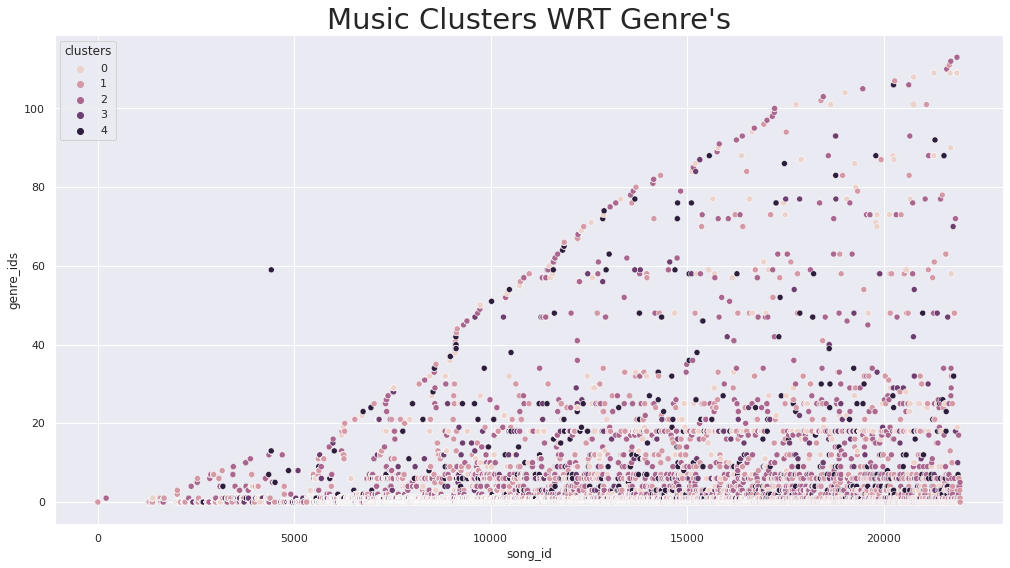

In [ ]:
plt.figure(figsize= (17,9))
sns.scatterplot(x = 'song_id', y = 'genre_ids', hue = 'clusters', data = train_merged);
sns.set(style= 'darkgrid')
plt.title("Music Clusters WRT Genre's", fontsize = 29);


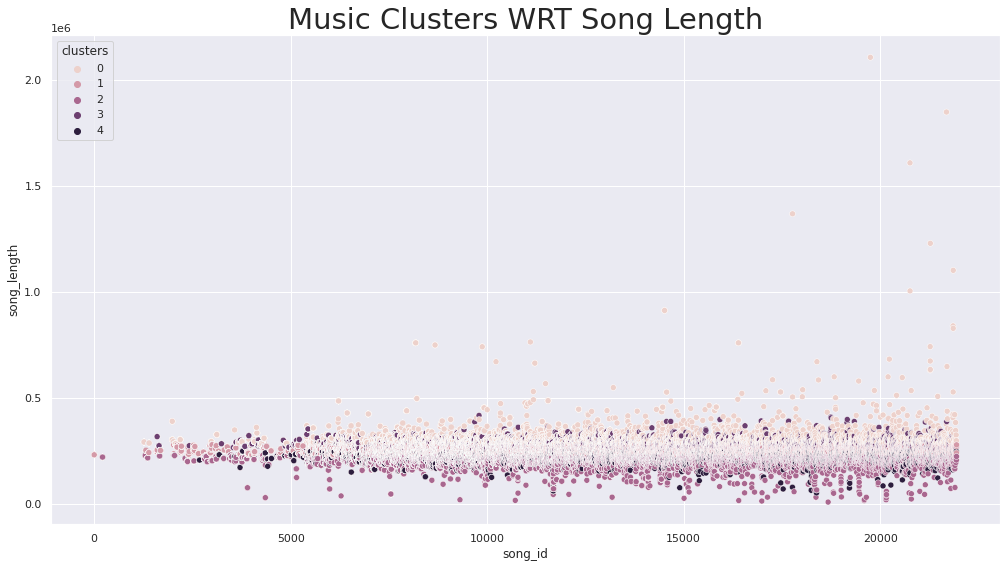

In [ ]:
plt.figure(figsize= (17,9))
sns.scatterplot(x = 'song_id', y = 'song_length', hue = 'clusters', data = train_merged);
sns.set(style= 'darkgrid')
plt.title('Music Clusters WRT Song Length', fontsize = 29);


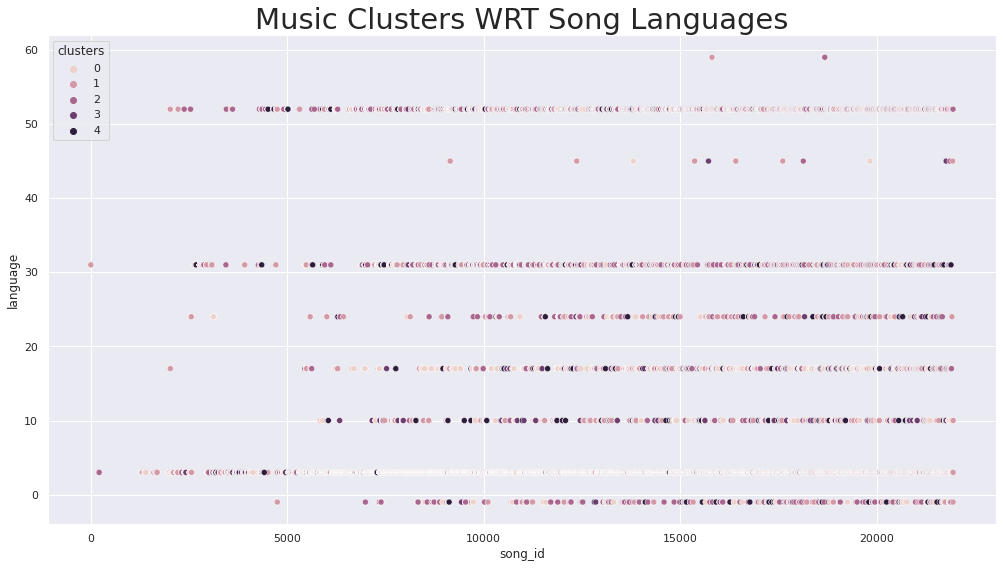

In [ ]:
plt.figure(figsize= (17,9))
sns.scatterplot(x = 'song_id', y = 'language', hue = 'clusters', data = train_merged);
sns.set(style= 'darkgrid')
plt.title('Music Clusters WRT Song Languages', fontsize = 29);


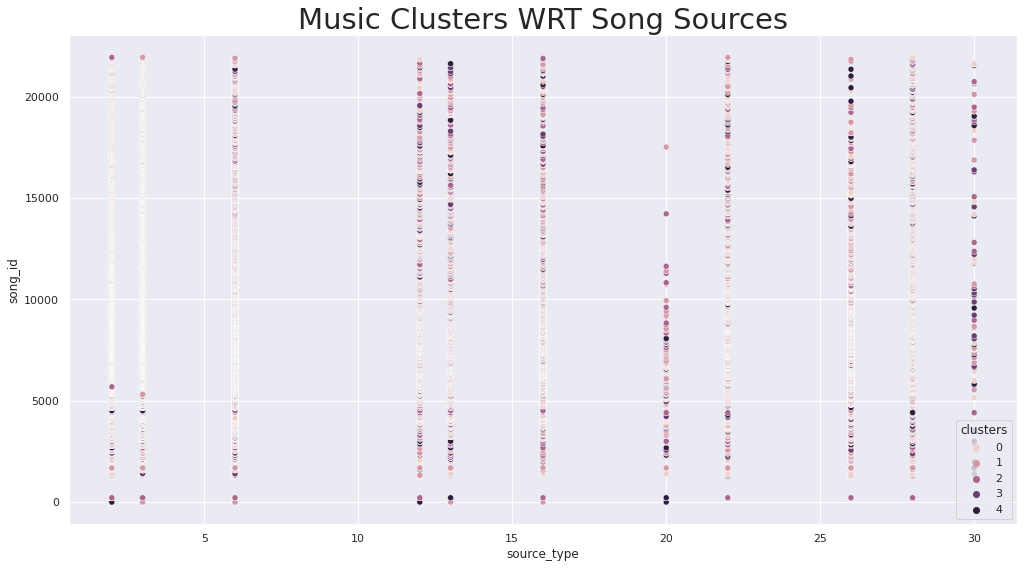

In [ ]:
plt.figure(figsize= (17,9))
sns.scatterplot(x = 'source_type', y = 'song_id', hue = 'clusters', data = train_merged);
sns.set(style= 'darkgrid')
plt.title('Music Clusters WRT Song Sources', fontsize = 29);


# **Data Insights and Conclusion**

View on [Google Docs](https://docs.google.com/document/d/1x1vPgCkyN5MEoi5IuBJqvYPGwM6QUAHwYEoL8dXrIMg/edit?usp=sharing)